# English Football Club Goals - Bar Chart Race 
By ***Ahmad Zaenun Faiz***

This is a data visualization using Python to visualize the accumulation of goal in the top tier English Football League/Premier League. I use Matplotlib, Pandas and NumPy library to make this visualization

Reference: https://www.dunderdata.com/blog/create-a-bar-chart-race-animation-in-python-with-matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import and reshape the data

In [2]:
fc = pd.read_csv('https://raw.githubusercontent.com/ahmadzfaiz/python-data-visual/main/data/1.%20English%20Football%20Match/england.csv')

fc

C:\Users\Ahmad Zaenun Faiz\AppData\Local\Temp\ipykernel_5148\726381035.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fc = pd.read_csv('https://raw.githubusercontent.com/ahmadzfaiz/python-data-visual/main/data/1.%20English%20Football%20Match/england.csv')


,Date,Season,home,visitor,hgoal,vgoal,division,tier,totgoal,goaldif,result
0,1888-09-08,1888,Bolton Wanderers,Derby County,3,6,1,1,9,-3,A
1,1888-09-08,1888,Everton,Accrington F.C.,2,1,1,1,3,1,H
2,1888-09-08,1888,Preston North End,Burnley,5,2,1,1,7,3,H
3,1888-09-08,1888,Stoke City,West Bromwich Albion,0,2,1,1,2,-2,A
4,1888-09-08,1888,Wolverhampton Wanderers,Aston Villa,1,1,1,1,2,0,D
...,...,...,...,...,...,...,...,...,...,...,...
199879,3/7/2020,2019,Plymouth Argyle,Macclesfield,3,0,4,4,3,3,H
199880,3/7/2020,2019,Salford City,Bradford City,2,0,4,4,2,2,H
199881,3/7/2020,2019,Swindon Town,Forest Green Rovers,0,2,4,4,2,-2,A
199882,3/7/2020,2019,Walsall,Exeter City,3,1,4,4,4,2,H


In [3]:
home = fc[['Date', 'Season', 'home', 'hgoal', 'tier']]
away = fc[['Date', 'Season', 'visitor', 'vgoal', 'tier']]

In [4]:
home = home.loc[home['tier'] == 1]
away = away.loc[away['tier'] == 1]

home['home'].count()

49050

In [5]:
home['Club'] = home['home']
away['Club'] = away['visitor']

home['Goal'] = home['hgoal']
away['Goal'] = away['vgoal']

home = home[['Date', 'Club', 'Goal']]
away = away[['Date', 'Club', 'Goal']]

In [6]:
frames = [home, away]
dcc = pd.concat(frames)

In [7]:
dcc

,Date,Club,Goal
0,1888-09-08,Bolton Wanderers,3
1,1888-09-08,Everton,2
2,1888-09-08,Preston North End,5
3,1888-09-08,Stoke City,0
4,1888-09-08,Wolverhampton Wanderers,1
...,...,...,...
198487,7/26/2020,Manchester United,2
198488,7/26/2020,Norwich City,0
198489,7/26/2020,Liverpool,3
198490,7/26/2020,Sheffield United,1


In [8]:
df = pd.crosstab(dcc['Date'], columns = dcc['Club'], values=dcc['Goal'], aggfunc = 'first')

In [9]:
df['Timeline'] = df.index
df = df.reset_index(drop=True)

df['day'] = pd.DatetimeIndex(df['Timeline']).day
df['month'] = pd.DatetimeIndex(df['Timeline']).month
df['year'] = pd.DatetimeIndex(df['Timeline']).year

df['Date'] = pd.to_datetime(dict(year=df.year, month=df.month, day=df.day))
df = df.sort_values('Date').reset_index(drop=True)

In [10]:
del df['Timeline']
del df['day']
del df['month']
del df['year']

df

Club,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,Bradford City,...,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers,Date
0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1888-09-08
1,NaN,5.0,NaN,5.0,NaN,NaN,5.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0,1888-09-15
2,NaN,1.0,NaN,2.0,NaN,NaN,6.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,1888-09-22
3,NaN,4.0,NaN,9.0,NaN,NaN,2.0,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,1888-09-29
4,NaN,4.0,NaN,0.0,NaN,NaN,3.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.0,1888-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-19
9315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2020-07-20
9316,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2020-07-21
9317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2020-07-22


## Create dataset of goal accumulation by club per date

In [11]:
data = df
data.fillna(0, inplace=True)

data = data.set_index('Date').cumsum()

data

Club,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,Bradford City,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
Date,,,,,,,,,,,,,,,,,,,,,
1888-09-08,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
1888-09-15,0.0,6.0,0.0,6.0,0.0,0.0,5.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0
1888-09-22,0.0,7.0,0.0,8.0,0.0,0.0,11.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,5.0
1888-09-29,0.0,11.0,0.0,17.0,0.0,0.0,13.0,0.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,7.0
1888-10-06,0.0,15.0,0.0,17.0,0.0,0.0,16.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-19,238.0,226.0,6918.0,6647.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5143.0,415.0,47.0,5419.0,660.0,4609.0,3538.0,316.0,702.0,4126.0
2020-07-20,238.0,226.0,6918.0,6647.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5143.0,415.0,47.0,5419.0,660.0,4609.0,3538.0,316.0,702.0,4128.0
2020-07-21,238.0,226.0,6918.0,6648.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5143.0,415.0,47.0,5419.0,660.0,4609.0,3538.0,316.0,702.0,4128.0


## Training model: Create bar charts for specific dates

In [12]:
spd = data.loc['2020-07-26'].head(10)

spd

Club
AFC Bournemouth      241.0
Accrington F.C.      226.0
Arsenal             6921.0
Aston Villa         6649.0
Barnsley              37.0
Birmingham City     3049.0
Blackburn Rovers    4306.0
Blackpool           1788.0
Bolton Wanderers    4156.0
Bradford City        584.0
Name: 2020-07-26 00:00:00, dtype: float64

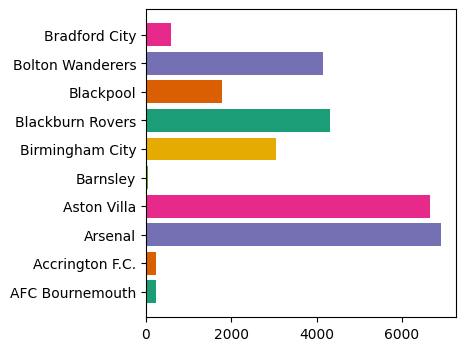

In [13]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
colors = plt.cm.Dark2(range(6))
y = spd.index
width = spd.values
ax.barh(y=y, width=width, color=colors);

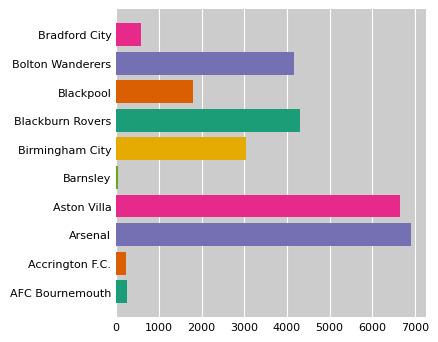

In [14]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

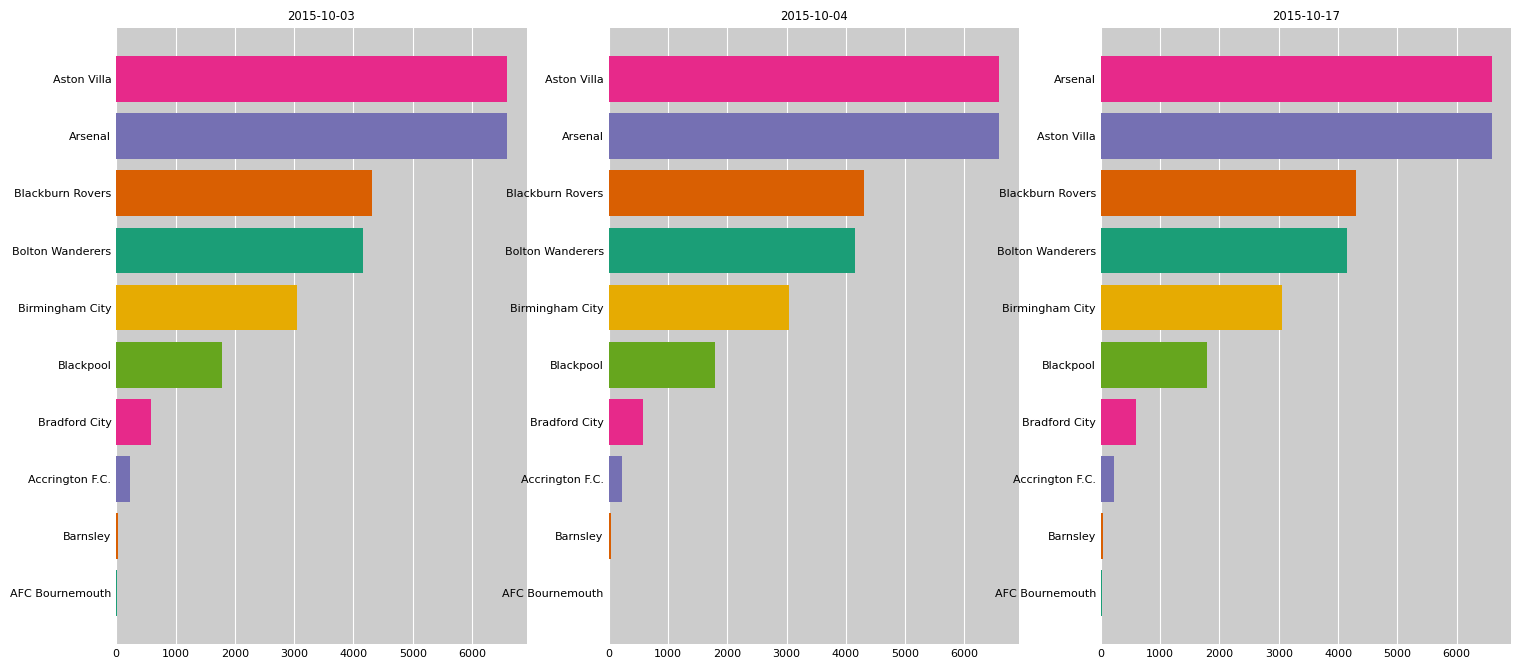

In [15]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=[18, 8], dpi=100)

dates = ['2015-10-03', '2015-10-04', '2015-10-17']
for ax, date in zip(ax_array, dates):
    spd = data.loc[date].head(10).sort_values()
    ax.barh(y=spd.index, width=spd.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

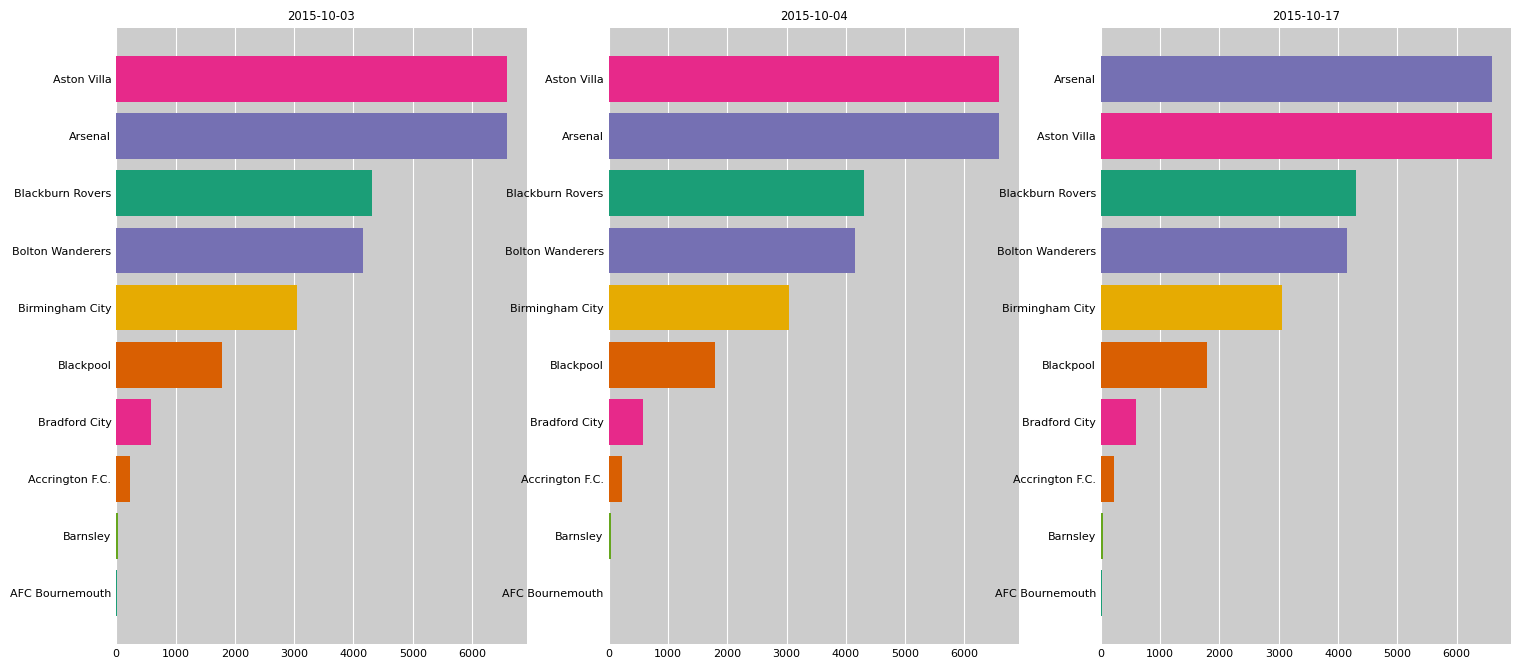

In [16]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=[18, 8], dpi=100)

dates = ['2015-10-03', '2015-10-04', '2015-10-17']
for ax, date in zip(ax_array, dates):
    spd = data.loc[date].head(10)
    y = data.loc[date].head(10).rank(method='first')
    ax.barh(y=y, width=spd.values, color=colors, tick_label=spd.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

## Training model: Better transition on the charts

In [17]:
data2 = data.loc['2015-10-04':'2015-10-17']
data2

Club,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,Bradford City,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-04,10.0,226.0,6589.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5074.0,310.0,47.0,5074.0,456.0,4507.0,3296.0,316.0,702.0,4030.0
2015-10-17,11.0,226.0,6592.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5074.0,310.0,47.0,5074.0,456.0,4508.0,3299.0,316.0,702.0,4030.0


In [18]:
data2 = data2.reset_index()
data2

Club,Date,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
0,2015-10-04,10.0,226.0,6589.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,...,5074.0,310.0,47.0,5074.0,456.0,4507.0,3296.0,316.0,702.0,4030.0
1,2015-10-17,11.0,226.0,6592.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,...,5074.0,310.0,47.0,5074.0,456.0,4508.0,3299.0,316.0,702.0,4030.0


In [19]:
data2.index = data2.index * 5
data2

Club,Date,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
0,2015-10-04,10.0,226.0,6589.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,...,5074.0,310.0,47.0,5074.0,456.0,4507.0,3296.0,316.0,702.0,4030.0
5,2015-10-17,11.0,226.0,6592.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,...,5074.0,310.0,47.0,5074.0,456.0,4508.0,3299.0,316.0,702.0,4030.0


In [20]:
last_idx = data2.index[-1] + 1
data_ext = data2.reindex(range(last_idx))
data_ext

Club,Date,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
0,2015-10-04,10.0,226.0,6589.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,...,5074.0,310.0,47.0,5074.0,456.0,4507.0,3296.0,316.0,702.0,4030.0
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-10-17,11.0,226.0,6592.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,...,5074.0,310.0,47.0,5074.0,456.0,4508.0,3299.0,316.0,702.0,4030.0


In [21]:
data_ext['Date'] = data_ext['Date'].fillna(method='ffill')
data_ext = data_ext.set_index('Date')
data_ext

Club,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,Bradford City,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-04,10.0,226.0,6589.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5074.0,310.0,47.0,5074.0,456.0,4507.0,3296.0,316.0,702.0,4030.0
2015-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-17,11.0,226.0,6592.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5074.0,310.0,47.0,5074.0,456.0,4508.0,3299.0,316.0,702.0,4030.0


In [22]:
data_rank_ext = data_ext.rank(axis=1, method='first')
data_rank_ext

Club,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,Bradford City,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-04,1.0,15.0,63.0,64.0,3.0,43.0,54.0,36.0,53.0,21.0,...,57.0,16.0,6.0,58.0,20.0,55.0,47.0,17.0,24.0,52.0
2015-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-17,1.0,15.0,64.0,63.0,3.0,43.0,54.0,36.0,53.0,21.0,...,57.0,16.0,6.0,58.0,20.0,55.0,47.0,17.0,24.0,52.0


In [23]:
data_ext = data_ext.interpolate()
data_ext

Club,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,Bradford City,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-04,10.0,226.0,6589.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5074.0,310.0,47.0,5074.0,456.0,4507.0,3296.0,316.0,702.0,4030.0
2015-10-04,10.2,226.0,6589.6,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5074.0,310.0,47.0,5074.0,456.0,4507.2,3296.6,316.0,702.0,4030.0
2015-10-04,10.4,226.0,6590.2,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5074.0,310.0,47.0,5074.0,456.0,4507.4,3297.2,316.0,702.0,4030.0
2015-10-04,10.6,226.0,6590.8,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5074.0,310.0,47.0,5074.0,456.0,4507.6,3297.8,316.0,702.0,4030.0
2015-10-04,10.8,226.0,6591.4,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5074.0,310.0,47.0,5074.0,456.0,4507.8,3298.4,316.0,702.0,4030.0
2015-10-17,11.0,226.0,6592.0,6589.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5074.0,310.0,47.0,5074.0,456.0,4508.0,3299.0,316.0,702.0,4030.0


In [24]:
data_rank_ext = data_rank_ext.interpolate()
data_rank_ext

Club,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,Bradford City,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-04,1.0,15.0,63.0,64.0,3.0,43.0,54.0,36.0,53.0,21.0,...,57.0,16.0,6.0,58.0,20.0,55.0,47.0,17.0,24.0,52.0
2015-10-04,1.0,15.0,63.2,63.8,3.0,43.0,54.0,36.0,53.0,21.0,...,57.0,16.0,6.0,58.0,20.0,55.0,47.0,17.0,24.0,52.0
2015-10-04,1.0,15.0,63.4,63.6,3.0,43.0,54.0,36.0,53.0,21.0,...,57.0,16.0,6.0,58.0,20.0,55.0,47.0,17.0,24.0,52.0
2015-10-04,1.0,15.0,63.6,63.4,3.0,43.0,54.0,36.0,53.0,21.0,...,57.0,16.0,6.0,58.0,20.0,55.0,47.0,17.0,24.0,52.0
2015-10-04,1.0,15.0,63.8,63.2,3.0,43.0,54.0,36.0,53.0,21.0,...,57.0,16.0,6.0,58.0,20.0,55.0,47.0,17.0,24.0,52.0
2015-10-17,1.0,15.0,64.0,63.0,3.0,43.0,54.0,36.0,53.0,21.0,...,57.0,16.0,6.0,58.0,20.0,55.0,47.0,17.0,24.0,52.0


Text(0.5, 1.0, 'Akhir')

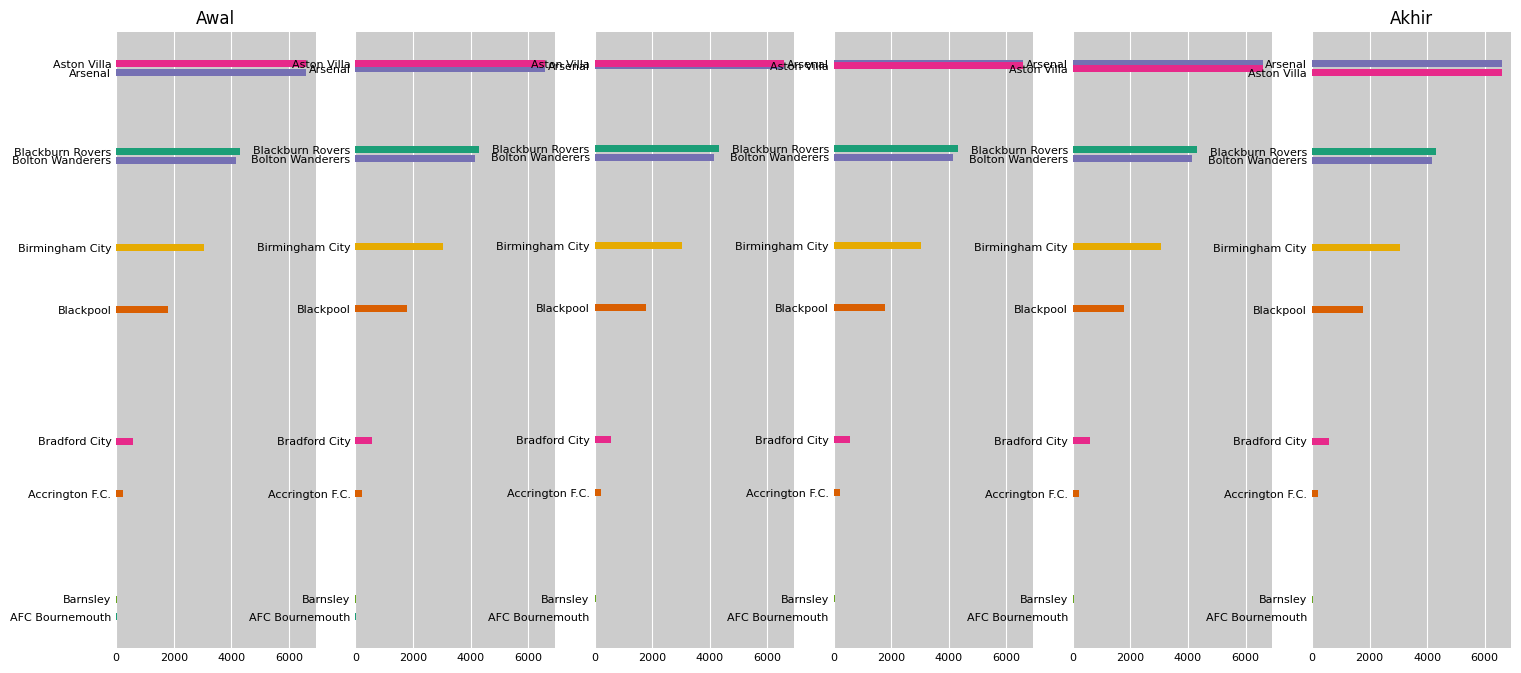

In [25]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=[18, 8], dpi=100)

labels = data_ext.columns
for i, ax in enumerate(ax_array.flatten()):
    y = data_rank_ext.iloc[i].head(10)
    width = data_ext.iloc[i].head(10)
    ax.barh(y=y, width=width, color=colors, tick_label=labels[:10])
    nice_axes(ax)
ax_array[0].set_title('Awal')
ax_array[-1].set_title('Akhir')

## Prepare all data for visualization

In [50]:
def prepare_data(data, steps=5):
    data = data.reset_index()
    data.index = data.index * steps
    last_idx = data.index[-1] + 1
    data_ext = data.reindex(range(last_idx))
    data_ext['Date'] = data_ext['Date'].fillna(method='ffill')
    data_ext = data_ext.set_index('Date')
    data_rank_ext = data_ext.rank(axis=1, method='first')
    data_ext = data_ext.interpolate()
    data_rank_ext = data_rank_ext.interpolate()
    data_ext = data_ext.tail(1000000)
    data_rank_ext = data_rank_ext.tail(1000000)
    return data_ext, data_rank_ext

data_ext, data_rank_ext = prepare_data(data)
data_ext.tail(100)

Club,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,Bradford City,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,231.0,226.0,6912.0,6644.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5143.0,415.0,47.0,5409.2,655.0,4609.0,3529.0,316.0,702.0,4122.0
2020-07-01,231.0,226.0,6912.0,6644.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5143.0,415.0,47.0,5409.4,655.0,4609.0,3529.0,316.0,702.0,4122.0
2020-07-01,231.0,226.0,6912.0,6644.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5143.0,415.0,47.0,5409.6,655.0,4609.0,3529.0,316.0,702.0,4122.0
2020-07-01,231.0,226.0,6912.0,6644.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5143.0,415.0,47.0,5409.8,655.0,4609.0,3529.0,316.0,702.0,4122.0
2020-07-02,231.0,226.0,6912.0,6644.0,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5143.0,415.0,47.0,5410.0,655.0,4609.0,3529.0,316.0,702.0,4122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-22,238.6,226.0,6918.6,6648.2,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5143.0,415.0,47.0,5419.2,660.4,4609.0,3539.2,316.0,702.0,4128.0
2020-07-22,239.2,226.0,6919.2,6648.4,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5143.0,415.0,47.0,5419.4,660.8,4609.0,3539.4,316.0,702.0,4128.0
2020-07-22,239.8,226.0,6919.8,6648.6,37.0,3049.0,4306.0,1788.0,4156.0,584.0,...,5143.0,415.0,47.0,5419.6,661.2,4609.0,3539.6,316.0,702.0,4128.0


In [51]:
data_rank_ext.head()

Club,AFC Bournemouth,Accrington F.C.,Arsenal,Aston Villa,Barnsley,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,Bradford City,...,Sunderland,Swansea City,Swindon Town,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wimbledon,Wolverhampton Wanderers
Date,,,,,,,,,,,,,,,,,,,,,
1888-09-08,1.0,57.0,2.0,58.0,3.0,4.0,5.0,6.0,63.0,7.0,...,49.0,50.0,51.0,52.0,53.0,62.0,54.0,55.0,56.0,59.0
1888-09-08,1.0,57.6,2.0,58.6,3.0,4.0,15.8,5.8,62.8,6.8,...,48.4,49.4,50.4,51.4,52.4,61.2,53.4,54.4,55.4,58.4
1888-09-08,1.0,58.2,2.0,59.2,3.0,4.0,26.6,5.6,62.6,6.6,...,47.8,48.8,49.8,50.8,51.8,60.4,52.8,53.8,54.8,57.8
1888-09-08,1.0,58.8,2.0,59.8,3.0,4.0,37.4,5.4,62.4,6.4,...,47.2,48.2,49.2,50.2,51.2,59.6,52.2,53.2,54.2,57.2
1888-09-08,1.0,59.4,2.0,60.4,3.0,4.0,48.2,5.2,62.2,6.2,...,46.6,47.6,48.6,49.6,50.6,58.8,51.6,52.6,53.6,56.6


## Time to make an animation

In [28]:
from matplotlib.animation import FuncAnimation

In [48]:
def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = data_rank_ext.iloc[i]
    width = data_ext.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    # date_str = data_ext.tail(100).index[i].strftime('%B %-d, %Y')
    ax.set_title(f'Number of Club Goals in Top Tier English Football League')
    
fig = plt.Figure(figsize=(12, 20), dpi=100)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(data_ext), interval=100, repeat=False)

In [49]:
anim.save('football.mp4', fps=30)